## A bit about Autoencoders

Autoencoders have two parts - an encoder that maps the input to a condensed internal representation (the bottleneck), and a decoder that attempts to convert the internal representation back to the original input. 

The full autoencoder is not used as such. Rather is is the separate encoder and decoder parts which are valuable. The goal of the autoencoder is the creation of the middle bottleneck vector, which distils the original input down to a simpler representation that preserves the information contained in the original input. In image masking inputs can be fed through the encoder layer to reduce the dimensionality of data, this representaion can then be used to find generally where the mask should be placed. In artificial image generation, a random vector can be fed through the decoder layer to create a new training image.

Inspired by 
    * https://blog.keras.io/building-autoencoders-in-keras.html
    * https://towardsdatascience.com/teaching-a-variational-autoencoder-vae-to-draw-mnist-characters-978675c95776

In [1]:
import numpy as np
from src.mini_keras_ae import AE_0
from tensorflow.python.keras.datasets import mnist
from src.mini_keras_ae import *
import matplotlib.pyplot as plt

%autoreload 2

## If you would like to play with the commented out 
## autoencoder code below uncomment these imports

# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Input, Dense, LeakyReLU
# from tensorflow.python.keras.layers import Conv2D, Conv2DTranspose

# Load Data:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and Reshape Data:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

/Users/ophidian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(60000, 784)
(10000, 784)


In [2]:
IMG_SHAPE = 28*28*1
BOTTLE_NECK = 50 # 10


M = AE_0(IMG_SHAPE, BOTTLE_NECK)
ae = M.autoencoder

## Trying out different combinations of layers, activations, etc
## is an excellent way to get comfortable with Neural Networks
## Comment out the two lines immediately above, uncomment the code below and start playing

# encoder = Sequential([
#                 Dense(BOTTLE_NECK, input_dim=INPUT_SHAPE),
#                 LeakyReLU()
#                 ])

# decoder = Sequential([
#                 Dense(INPUT_SHAPE, input_dim=BOTTLE_NECK),
#                 LeakyReLU()
#                 ])

# ae = Sequential([encoder, decoder])
# ae.compile(optimizer='adagrad',
#            loss='mse',
#           )

ae.fit(x_train, x_train, batch_size=10, epochs=5)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 17s 282us/step - loss: 0.0146

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 17s 277us/step - loss: 0.0104

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 18s 292us/step - loss: 0.0099

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 18s 301us/step - loss: 0.0097

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 18s 296us/step - loss: 0.0096



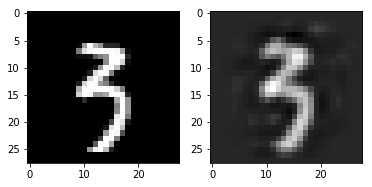

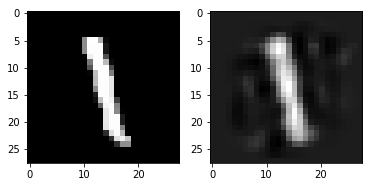

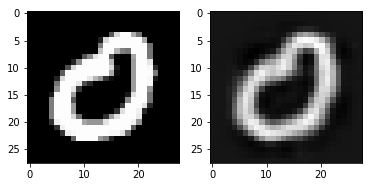

In [3]:
n = 233
m = 3

for ii in range(n*m, n*m+m):
    img_ = x_test[ii]
    res_ = ae.predict(np.array([img_]))
    f, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(np.reshape(img_, (28,28)), cmap='gray')
    ax2.imshow(np.reshape(res_, (28,28)), cmap='gray')
    plt.show()

# Variations on a Theme by Keras
randomly changing things in the name of experimentation

## comparison: convolution versus more denseness


In [4]:
# reshape test train data for conv net

x_train_c = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test_c = np.reshape(x_test, (len(x_test), 28, 28, 1))
M_conv = AE_conv_1()
ae_conv = M_conv.autoencoder
print(ae_conv.count_params())
ae_conv.fit(x_train_c, x_train_c, batch_size=10, epochs=5)

109108
Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 56s 930us/step - loss: 0.0283

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 1008s 17ms/step - loss: 0.0243

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 55s 924us/step - loss: 0.0231

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 56s 929us/step - loss: 0.0224

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 57s 945us/step - loss: 0.0219



In [5]:
M_d = AE_dense_1()
ae_dense = M_d.autoencoder
print(ae_dense.count_params())
ae_dense.fit(x_train, x_train, batch_size=10, epochs=5)

110394
Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 20s 341us/step - loss: 0.0346

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 20s 332us/step - loss: 0.0326

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 20s 335us/step - loss: 0.0324

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 20s 339us/step - loss: 0.0323

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 21s 351us/step - loss: 0.0323



```
Notice that compared to this dense autoencoder, the convolutional version is 
much more accurate and has fewer artifacts from unrelated digits after 5 epochs 
despite the fact that both models have approximately the same number of 
hyperparamteres.
```

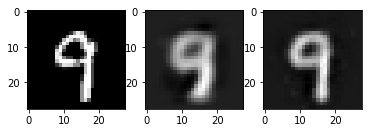

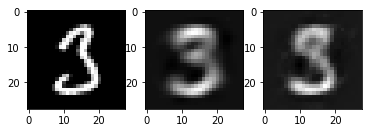

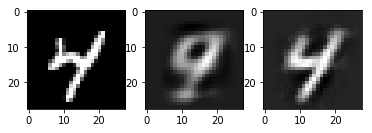

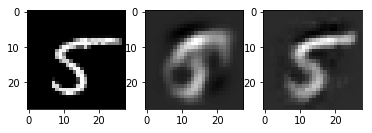

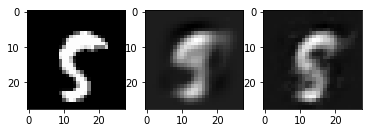

In [6]:
n = 233
m = 5

for ii in range(n*m, n*m+m):
    img_ = x_test[ii]
    img_c = x_test_c[ii]
    res_c = ae_conv.predict(np.array([img_c]))
    res_d = ae_dense.predict(np.array([img_]))
    f, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.imshow(np.reshape(img_, (28,28)), cmap='gray')
    ax2.imshow(np.reshape(res_d, (28,28)), cmap='gray')
    ax3.imshow(np.reshape(res_c, (28,28)), cmap='gray')
    plt.show()

## TODO:

- demo tensorboard
- demo decoder for new image generation
- demo encoder for image classification